
Name:Shimul Paul
ID: 160204014
Section:A1


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as matplot

In [9]:
#Read the train file
trainData = np.loadtxt('D:/All Videos and Lectures of 4.2/Pattern Lab/Lab 2/train.txt',delimiter = ' ')
#trainData

In [10]:
#Read the test file
testData = np.loadtxt('D:/All Videos and Lectures of 4.2/Pattern Lab/Lab 2/test.txt',delimiter = ' ')
#testData

In [11]:
#let Assume if 1 then its in class A
classA =[]
for a in trainData:
    if a[2] == 1:
        classA.append([a[0],a[1]])

#classA

In [12]:
#let Assume if 1 then its in class B
classB =[]
for a in trainData:
    if a[2] == 2:
        classB.append([a[0],a[1]])
#classB

In [13]:
#let separate test values and their class
testValues =[]
testClass =[]
for a in testData:
    testValues.append([a[0],a[1]])
    testClass.append(a[2])
#print('Values: ',testValues)

#print('Classes: ',testClass)


In [14]:
#convert the list to np array
classA = np.array(classA)
classB = np.array(classB)
testValues = np.array(testValues)
testClass = np.array(testClass)
#print('testValues class type',type(testClass))

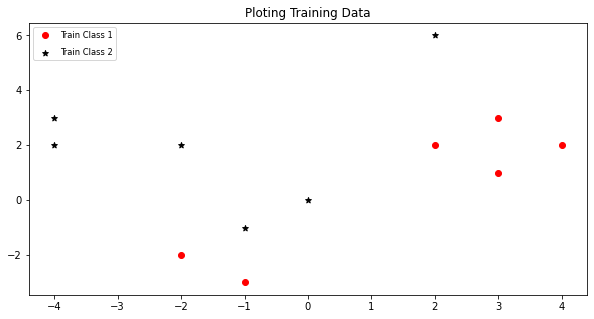

In [15]:
fig,ax = matplot.subplots()
ax.set_title('Ploting Training Data')
fig.set_figheight(5)
fig.set_figwidth(10)
ax.scatter(classA[:,0],classA[:,1],marker='o',color='r',label='Train Class 1')
ax.scatter(classB[:,0],classB[:,1],marker='*',color='k',label='Train Class 2')
legend = ax.legend(loc='upper left', shadow=False, fontsize='small',labelspacing=1)
legend.get_frame().set_facecolor('None')
matplot.show()

In [16]:
#mean of class a and class b
meanClassA = np.mean(classA,axis = 0)
meanClassB = np.mean(classB,axis = 0)

In [17]:
print(meanClassA)
print(meanClassB)

[1.5 0.5]
[-1.5  2. ]


In [18]:
predictionClassA = [0]*len(testValues)
predictionClassB = [0]*len(testValues)
predictionClass = [0]*len(testValues)

In [19]:
#create a temporary numpy array for store
tempValueClass = np.zeros((len(testValues),3))
#print(tempValueClass)

In [20]:
for i in range(len(testValues)):
    predictionClassA[i] = np.dot(np.transpose(meanClassA),testValues[i]-.5*np.dot(np.transpose(meanClassA),meanClassA))
    predictionClassB[i] = np.dot(np.transpose(meanClassB),testValues[i]-.5*np.dot(np.transpose(meanClassB),meanClassB))
    if(predictionClassA[i]>predictionClassB[i]):
        tempValueClass[i][0] = testValues[i][0]
        tempValueClass[i][1] = testValues[i][1]
        tempValueClass[i][2] = 1
        predictionClass[i] = 1
    else:
        tempValueClass[i][0] = testValues[i][0]
        tempValueClass[i][1] = testValues[i][1]
        tempValueClass[i][2] = 2
        predictionClass[i] = 2
    

In [21]:
#let tempValueClass if 1 then its in class A
classtestA =[]
for a in tempValueClass:
    if a[2] == 1:
        classtestA.append([a[0],a[1]])
#classA

In [22]:
#let tempValueClass if 2 then its in class B
classtestB =[]
for a in tempValueClass:
    if a[2] == 2:
        classtestB.append([a[0],a[1]])

#classB

In [23]:
#convert the list in numpy array
classtestA =np.array(classtestA)
classtestB = np.array(classtestB)
predictionClass = np.array(predictionClass)

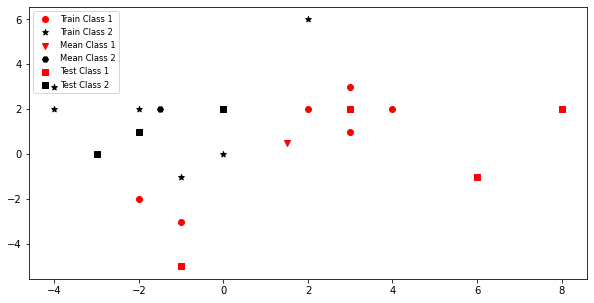

In [24]:
#plotting the meanclass,predicted class and training class
fig, ax = matplot.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)

ax.scatter(classA[:,0],classA[:,1],marker='o',color='r',label='Train Class 1')
ax.scatter(classB[:,0],classB[:,1],marker='*',color='k',label='Train Class 2')
ax.scatter(meanClassA[0],meanClassA[1],marker='v',color='r',label='Mean Class 1')
ax.scatter(meanClassB[0],meanClassB[1],marker='H',color='k',label='Mean Class 2')
ax.scatter(classtestA[:,0],classtestA[:,1],marker='s',color='r',label='Test Class 1')
ax.scatter(classtestB[:,0],classtestB[:,1],marker='s',color='k',label='Test Class 2')
legend = ax.legend(loc='upper left', shadow=False, fontsize='small',labelspacing=0.5)
legend.get_frame().set_facecolor('None')
matplot.show()

In [25]:
X=[0]*12
Y=[0]*12
c=0
for x in range(-4,8,1):
    j=-((meanClassA[0]-meanClassB[0])*x-.5*np.dot(np.transpose(meanClassA),meanClassA)+
        .5*np.dot(np.transpose(meanClassB),meanClassB))/(meanClassA[1]-meanClassB[1])
    X[c]=x
    Y[c]=j
    c+=1    


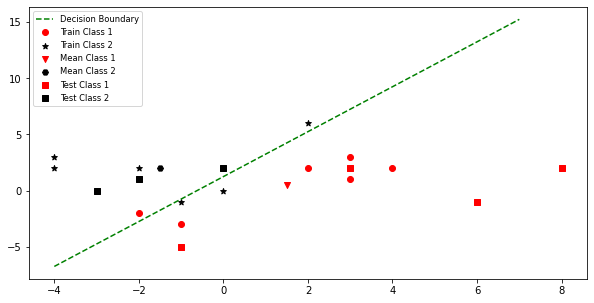

In [26]:
fig, ax = matplot.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)
ax.plot(X,Y,"--",label='Decision Boundary',color="g")
ax.scatter(classA[:,0],classA[:,1],marker='o',color='r',label='Train Class 1')
ax.scatter(classB[:,0],classB[:,1],marker='*',color='k',label='Train Class 2')
ax.scatter(meanClassA[0],meanClassA[1],marker='v',color='r',label='Mean Class 1')
ax.scatter(meanClassB[0],meanClassB[1],marker='H',color='k',label='Mean Class 2')
ax.scatter(classtestA[:,0],classtestA[:,1],marker='s',color='r',label='Test Class 1')
ax.scatter(classtestB[:,0],classtestB[:,1],marker='s',color='k',label='Test Class 2')
legend = ax.legend(loc='upper left', shadow=False, fontsize='small',labelspacing=0.5)
legend.get_frame().set_facecolor('None')
matplot.show()


In [27]:
accuracy = 0
for x,y in zip(testClass,predictionClass):
    if (x == y):
        accuracy +=1
accuracy = accuracy/len(testClass)*100
print('Accuracy = ', accuracy)


Accuracy =  85.71428571428571
